In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Q1.A) Random Forest Model

In [2]:
#importing the data
airline = pd.read_excel("Airline Satisfaction.xlsx")
airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [3]:
#EDA
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [4]:
#Cheking Missing values
airline.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

In [5]:
airline[["Arrival Delay in Minutes"]]

,Arrival Delay in Minutes
0,18.0
1,6.0
2,0.0
3,9.0
4,0.0
...,...
9995,24.0
9996,0.0
9997,0.0
9998,11.0


In [6]:
airline['Arrival Delay in Minutes'].skew()

7.681208890883187

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

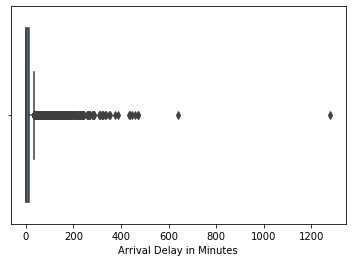

In [7]:
sns.boxplot(airline['Arrival Delay in Minutes'])

In [8]:
airline["Arrival Delay in Minutes"].median()

0.0

In [9]:
#replacing Missing values with median
airline["Arrival Delay in Minutes"].fillna(airline["Arrival Delay in Minutes"].median(),inplace = True )
airline.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
#Descriptive Stats
airline.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.202500,0.431100
std,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.767476,0.495255
min,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000,1.000000
max,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000


In [11]:
airline.shape

(10000, 24)

In [12]:
#One hot encoding for categorical variable
airline_b =pd.get_dummies(airline,columns=['Gender','Customer Type','Type of Travel','Class'])
airline_b.head(8)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,0,0,1,1,0,0,1,0,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,0,0,1,0,1,1,0,1,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,1,0,1,1,0,1,0,1,0,0
5,111157,26,1180,3,4,2,1,1,2,1,...,0,1,0,1,0,0,1,0,1,0
6,82113,47,1276,2,4,2,3,2,2,2,...,0,0,1,1,0,0,1,0,1,0
7,96462,52,2035,4,3,4,4,5,5,5,...,1,1,0,1,0,1,0,1,0,0


In [13]:
#Splitting the data
y = airline_b[['satisfaction']]
x = airline_b.drop(columns=['id','satisfaction'])

In [14]:
x.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,18.0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,6.0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,9.0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0.0,0,1,1,0,1,0,1,0,0


In [15]:
#Training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [16]:
len(x_train),len(x_test),len(y_train),len(y_test)

(8000, 2000, 8000, 2000)

In [17]:
x_train.shape,y_train.shape

((8000, 27), (8000, 1))

In [18]:
#Building the Model
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators=500,random_state=42)
model = Rf.fit(x_train,y_train)

In [19]:
y_test

,satisfaction
6252,0
4684,1
1731,1
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,0


In [20]:
#Prediction on y_test
y_test['RFM_Prediction']=model.predict(x_test)
y_test

,satisfaction,RFM_Prediction
6252,0,0
4684,1,0
1731,1,0
4742,0,0
4521,0,0
...,...,...
6412,1,1
8285,0,0
7853,1,1
1095,0,0


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
print(confusion_matrix(y_test['satisfaction'],y_test['RFM_Prediction']))

[[1138   36]
 [  59  767]]


In [23]:
print(accuracy_score(y_test['satisfaction'],y_test['RFM_Prediction'])) 

0.9525


### Accuracy of the problem solved using Random Forest Model is 0.9525


### Q1.B) Support Vector Machine

In [24]:
airline_b.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,70172,13,460,3,4,3,1,5,3,5,...,0,0,1,1,0,0,1,0,0,1
1,5047,25,235,3,2,3,3,1,3,1,...,0,0,1,0,1,1,0,1,0,0
2,110028,26,1142,2,2,2,2,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,24026,25,562,2,5,5,5,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,119299,61,214,3,3,3,3,4,5,5,...,1,0,1,1,0,1,0,1,0,0


In [25]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test  = SC.fit_transform(x_test)

In [26]:
from sklearn.svm import SVC
SVM = SVC(kernel ='poly')
model = SVM.fit(x_train,y_train)

In [27]:
y_test['SVM_Prediction'] = model.predict(x_test)

In [28]:
print(accuracy_score(y_test['satisfaction'],y_test['SVM_Prediction']))

0.915


### Accuracy of the Support Vector Machine model is 0.915

## Q2.A) Decision Tree Model


In [29]:
hr_dataset = pd.read_csv('hr_data.csv')
hr_dataset.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,attrition,promotion_last_5years,department,salary
0,1003,2,157,3,0,left,0,sales,low
1,1005,5,262,6,0,left,0,sales,medium
2,1486,7,272,4,0,left,0,sales,medium
3,1038,5,223,5,0,left,0,sales,low
4,1057,2,159,3,0,left,0,sales,low


In [30]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   attrition              14999 non-null  object
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.0+ MB


In [31]:
hr_dataset.shape

(14999, 9)

In [32]:
hr_dataset.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
attrition                0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [33]:
cat_col = ['attrition','department','salary']
dummy = pd.get_dummies(hr_dataset,columns = cat_col,drop_first=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [35]:
cat_col = ['attrition','department','salary']
for i in cat_col :
    hr_dataset[i]=LE.fit_transform(hr_dataset[i])  

In [36]:
y = hr_dataset[["attrition"]]
x = hr_dataset.drop(columns=["attrition"])

In [37]:
x.shape

(14999, 8)

In [38]:
y.shape

(14999, 1)

In [39]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size = 0.85,random_state = 144)

In [40]:
len(x_train),len(x_test),len(y_train),len(y_test)

(12749, 2250, 12749, 2250)

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [42]:
tree_model = tree.fit(x_train,y_train)

In [43]:
y_test['Pred_Attrition']=tree_model.predict(x_test)
y_test

,attrition,Pred_Attrition
14102,1,1
13840,1,1
13144,1,1
10356,1,1
9796,1,1
...,...,...
8401,1,1
124,0,0
5378,1,1
6292,1,0


In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
print(accuracy_score(y_test['attrition'],y_test['Pred_Attrition']))

0.9675555555555555


In [46]:
print(confusion_matrix(y_test['attrition'],y_test['Pred_Attrition']))

[[ 507   39]
 [  34 1670]]


In [47]:
print(classification_report(y_test['attrition'],y_test['Pred_Attrition']))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       546
           1       0.98      0.98      0.98      1704

    accuracy                           0.97      2250
   macro avg       0.96      0.95      0.96      2250
weighted avg       0.97      0.97      0.97      2250



### Accuracy of Decision Tree model is 0.97

### Q2.B) KNN Model


In [48]:
# feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [49]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [50]:
#Predicting the test set result  
y_test['KNN_Pred']= classifier.predict(x_test)

In [51]:
y_test

,attrition,Pred_Attrition,KNN_Pred
14102,1,1,0
13840,1,1,1
13144,1,1,1
10356,1,1,1
9796,1,1,1
...,...,...,...
8401,1,1,1
124,0,0,0
5378,1,1,1
6292,1,0,1


In [52]:
print(accuracy_score(y_test['attrition'],y_test['KNN_Pred']))

0.9568888888888889


In [53]:
print(confusion_matrix(y_test['attrition'],y_test['KNN_Pred']))

[[ 504   42]
 [  55 1649]]


### Accuracy using KNN model is 0.95

### Q3 Linear Regression Model 

In [54]:
bolly_data = pd.read_csv('bollywood.csv')
bolly_data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [55]:
bolly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [56]:
bolly_data.isnull().sum()

SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
dtype: int64

In [57]:
#so need to replace same names with additional space between them ex: action,thriller
bolly_data['Genre'].unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

In [58]:
bolly_data[bolly_data['Genre'] == 'Action ']

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
10,11,28-Mar-14,Dishkiyaoon,N,Action,28,6.0,2397647,3308,465
13,14,18-Jan-13,Mumbai Mirror,N,Action,4,1.8,235767,192,164
21,22,7-Mar-14,Gulaab Gang,N,Action,27,14.3,4687259,13219,1605


In [59]:
bolly_data[bolly_data['Genre'] == 'Action']

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
15,16,18-Jan-13,Bandook,N,Action,4,0.09,28391,8,14
22,23,14-Feb-14,Gunday,N,Action,50,76.70,3503887,8383,1419
35,36,22-Feb-13,Zilla Ghaziabad,N,Action,36,16.00,1551786,1753,619
36,37,6-Jun-14,Holiday,HS,Action,50,129.00,6841635,14182,1997
41,42,24-Jan-14,Jai Ho,N,Action,120,111.00,868743,2783,404
43,44,25-Jul-14,Kick,N,Action,100,377.00,18986221,101275,10066
48,49,9-May-14,Koyelaanchal,HS,Action,8,2.00,591838,347,31
54,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1
61,62,12-Apr-13,Commando-A One Man Army,LW,Action,22,21.00,3162465,7519,562
77,78,3-Jan-14,Sholay 3D,N,Action,25,11.00,1001670,2110,268


In [60]:
#So here we remove the addional space and keep as it is in data
bolly_data.replace(to_replace='Action ',value='Action',inplace=True)
bolly_data.replace(to_replace='Thriller ',value='Thriller',inplace=True)
bolly_data['Genre'].unique()

array(['Romance', 'Thriller', 'Comedy', ' Drama ', 'Action'], dtype=object)

In [61]:
#Dealing with categorical columns with one hot encoding
cat_cal     = ['ReleaseTime','Genre']

In [62]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [63]:
for i in cat_cal :
    bolly_data[i] = LE.fit_transform(bolly_data[i])

In [64]:
bolly_data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,2,3,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,3,4,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,3,2,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,3,0,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,3,2,18,10.80,3113427,4512,1224


In [65]:
#Identifiying the target variable
y = bolly_data[["BoxOfficeCollection"]]
x = bolly_data.drop(columns=["MovieName","Release Date","SlNo","BoxOfficeCollection"])

In [66]:
x.head()

,ReleaseTime,Genre,Budget,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,2,3,36,8576361,26622,2527
1,3,4,10,1087320,1129,137
2,3,2,10,572336,586,54
3,3,0,7,42626,86,19
4,3,2,18,3113427,4512,1224


In [67]:
y.head()

,BoxOfficeCollection
0,104.00
1,12.00
2,4.00
3,0.35
4,10.80


In [68]:
#Training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((126, 6), (23, 6), (126, 1), (23, 1))

In [69]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
modellr = LR.fit(x_train,y_train)

In [70]:
y_test['BoxOfficeCollection_Pred'] = modellr.predict(x_test)

In [71]:
from sklearn.metrics import r2_score,mean_squared_error
print('r2_score',round(r2_score(y_test['BoxOfficeCollection'],y_test['BoxOfficeCollection_Pred']),3))
from math import sqrt
print('RMSE : ',sqrt(mean_squared_error(y_test['BoxOfficeCollection'],y_test['BoxOfficeCollection_Pred'])))

r2_score 0.357
RMSE :  133.1729169059457


#### So the RMSE and R-squared value for the model is RMSE = 42.79 and R_Sq = 0.69

In [72]:
modellr.score(x,y)

0.5314416126104369

In [76]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(),x,y,cv=10)
scores

array([ 0.8746202 ,  0.65820756,  0.51050461,  0.61004746,  0.03788677,
        0.37561924,  0.55649223,  0.51384571, -0.19462262, -0.90207666])

In [77]:
np.average(scores)

0.30405245067607056